# Simulation

We often encounter differential equations, in particular from Newton's second law of motion, but also from other equations.
For instance, an object on a horizontal, smooth surface connected to a spring whose one end is fixed, can be
modeled by the differential equation

>$m\ddot x+kx=0$.

This is a second order equation that can be formulated as two coupled first order equations. 
We introduce the velocity, $v$, by

>$\dot x=v$

Then the first equation can be written as $m\dot v+kx=0$, and isolating the time derivative of the velocity yields

>$\dot v=-\frac{k}{m}x$

We now have two first order equation that we wish to solve.
With acccompanying initial conditions (numerical values), and 
values for the parameters, $m$ and $k$, 
the system has a well-defined solution.
By solving we mean finding numercial approximations to the real solutions $x(t)$ and $v(t)$.


## Numerical solution
If the have the solution (position and velocity) at a time, $t$, we can find an approximation to the solution at
a time, $\Delta t$, later by computing new values of the positon as the old value of the position plus the product of the velocity and the time interval.
The same goes for the velocity, and that gives us the following approximation

>$x(t+\Delta t)\approx x(t)+v(t)\Delta t$
>
>$v(t+\Delta t)\approx v(t)+a(t)\Delta t$

This method for computing the solution is called Euler's method.
To compute $v(t)$ and $a(t)$ we merely replace them by the right hand sides of $\dot x=v$ and $\dot v=-\frac{k}{m}x$.


Note that if we change the problem it is only the expression for the acceleration that changes. 
In the example the acceleration only depends on the position, $x$, $a(x)=-kx/m$.
In Python this is programmed as the following function where $-kx/m$ is computed and returned as $a(x)$
```python
def a(x):
    return -k*x/m
```
To perform many such calculations, to advance the solution into the future, we first define a time interval $t_1\leq t\leq t_2$ where we seek the solution. Next we decide how many data points we wish to generate.
We select a time interval from 0 to 10 with 1000 time intervals (of size $\Delta t=(10-0)/1000$). 
Below we define place the time points in an array with 1001 numbers, that is the initial time and 1000 extra. 
Finally, we compute the time step, here called, h.
```python
t1 = 0.0
t2 = 10.0
N = 1000
t = np.linspace(t1,t2,N+1)
h = (t2-t1)/N
```
We now allocate space for the positions and velocities for in two arrays, x and v, and insert the initial values. 
```python
x = np.zeros(N+1)
v = np.zeros(N+1)
x[0] = 0.1
v[0] = 0.0
```
Then we selct values for the parameters, mass, $m$, and spring constant, $k$.
```python
m = 1.0
k = 10.0
```
Finally we construct a loop that is repeated 1000 times, each time it advances the solution, and saves the values in x and v. 
```python
for i in range(N): # i will take on values in {0,1,2,...,N-1}
    v[i+1] = v[i] + a(x[i]) * h
    x[i+1] = x[i] + v[i] * h
```
Below we have the code with plot commands to visualize the solution, as
time plots of position and velocity, and a so-called phase plot where we plot v against x.

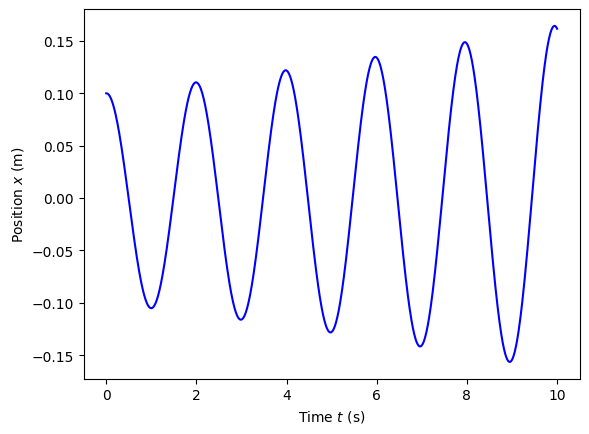

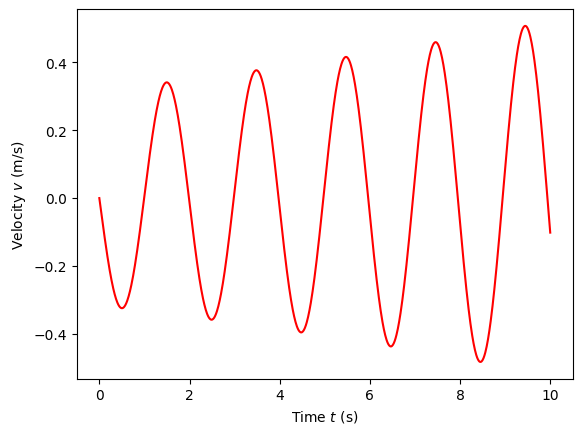

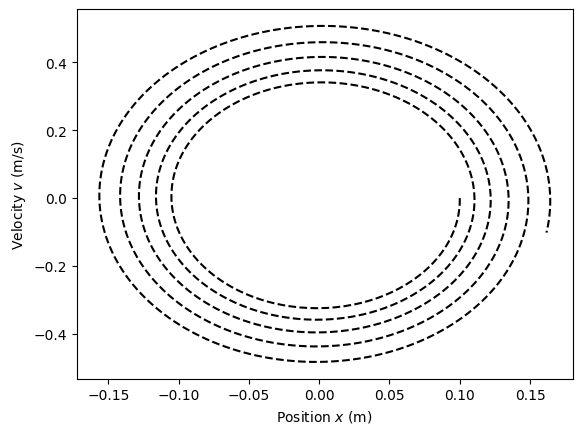

In [1]:
import numpy as np
import matplotlib.pyplot as plt
t1 = 0.0
t2 = 10.0
N = 1000
t = np.linspace(t1,t2,N+1)
h = (t2-t1)/N
x = np.zeros(N+1)
v = np.zeros(N+1)
m = 1.0
k = 10.0
x[0] = 0.1
v[0] = 0.0
def a(x):
    return -k*x/m
for i in range(N):
    v[i+1] = v[i] + a(x[i]) * h
    x[i+1] = x[i] + v[i] * h
plt.figure()
plt.xlabel('Time $t$ (s)')
plt.ylabel('Position $x$ (m)')
plt.plot(t,x,'b-')
plt.show()
plt.xlabel('Time $t$ (s)')
plt.ylabel('Velocity $v$ (m/s)')
plt.plot(t,v,'r-')
plt.show()
plt.xlabel('Position $x$ (m)')
plt.ylabel('Velocity $v$ (m/s)')
plt.plot(x,v,'k--')
plt.show()

We probably expected to see oscillations with a constant amplitude, but rather we observe that the amplitude increases. The numerical method used here is very simple, and we need to improve the method: 

>$x(t+\Delta t)\approx x(t)+v(t)\Delta t$
>
>$v(t+\Delta t)\approx v(t)+a(t)\Delta t$

A simple improvement is to reorder the two lines calculation, and then use the new value of the velocity as soon as it is calculated.
This gives the new equations

>$v(t+\Delta t)\approx v(t)+a(t)\Delta t$
>
>$x(t+\Delta t)\approx x(t)+v(t+\Delta t)\Delta t$

This modified method is called Euler-Cromer's method.

The loop used is now changed to 
```python
for i in range(N):
    v[i+1] = v[i] + a(x[i]) * h
    x[i+1] = x[i] + v[i+1] * h
```
where we see that the newly calculated velocity is used right away.
We test this modifiedd method below.

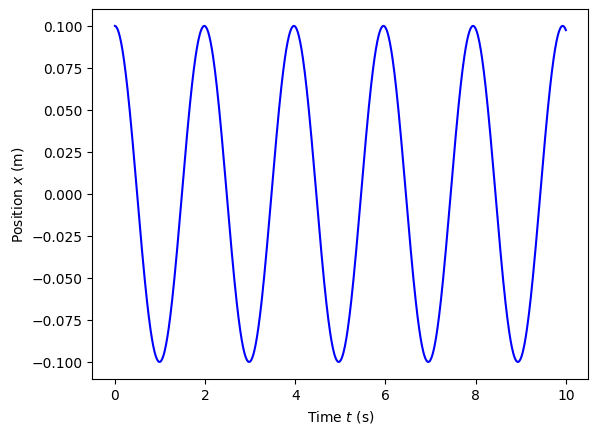

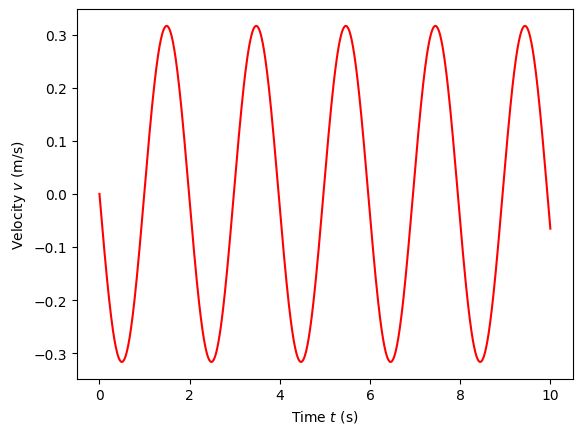

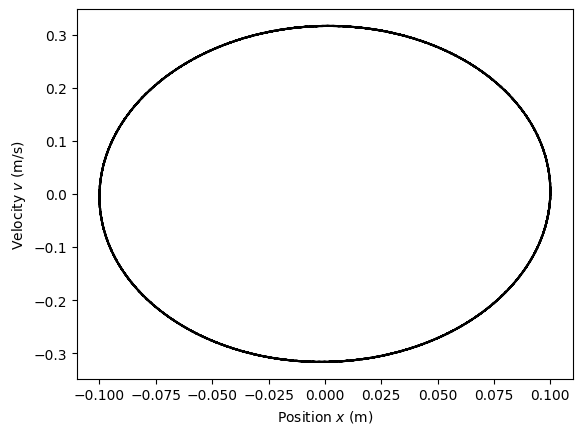

In [2]:
import numpy as np
import matplotlib.pyplot as plt
t1 = 0.0
t2 = 10.0
N = 1000
t = np.linspace(t1,t2,N+1)
h = (t2-t1)/N
x = np.zeros(N+1)
v = np.zeros(N+1)
m = 1.0
k = 10.0
d = 0.0
x[0] = 0.1
v[0] = 0.0
def a(x):
    return -k*x/m
for i in range(N):
    v[i+1] = v[i] + a(x[i]) * h
    x[i+1] = x[i] + v[i+1] * h
plt.figure()
plt.xlabel('Time $t$ (s)')
plt.ylabel('Position $x$ (m)')
plt.plot(t,x,'b-')
plt.show()
plt.xlabel('Time $t$ (s)')
plt.ylabel('Velocity $v$ (m/s)')
plt.plot(t,v,'r-')
plt.show()
plt.xlabel('Position $x$ (m)')
plt.ylabel('Velocity $v$ (m/s)')
plt.plot(x,v,'k--')
plt.show()

This was clearly an improvement, the amplitude of both position and velocity now seems to be constant. 
It is still a very simple algorithm and we normally will use more advanced methods that are available in Python's package SciPy. 
We will use the method in SciPy called solve_ivp (solve initial value problem), and to use it we need to write a function that computes the values of the time derivatives of position and velocity in the equations of motion $m\ddot x=F(t,x,v)$ where $F$ reprents the sum of all the forces acting on the object; it is possible that the forces depend on time, position, and velocity, hence these are arguments to the function. The state of the system, y, is an array that contains two elements, x and v, and can be extracted by
```python
    x,v = y
```
which is shorter than x = y[0] and v = y[1]. Using descriptive names for variables likes this makes the code easier to read. 
The Python function we need to program is
```python
def f(t,y):
    x,v = y
    dxdt = v
    dvdt = -k*x/m
    return [dxdt,dvdt]
```
The model is now ready and we need to supply solve_ivp with a few additional pieces of information.
Values should be given for the parameters before calling solve_ivp.
```python
m = 1.0
k = 10.0
```
Then we need to decide the time interval in which we want to compute the solution.
This should be an interval like t_span=[t1,t2], there should be values for the two times.
In addition we supply the initial conditions, also in an array, like y0=[0.1,0.0].
This is in principle all that is required, however, then solve_ivp will decide at what times the solution is computed.
If we are interested in plotting a solution we may not not automatically get enough points to get a nice graph, and so we
can supply the times at which we want the solution with t_eval=t, where t is an array with the times, usually we determine these with NumPy's method linspace. 
```python
t = np.linspace(t1,t2,N+1)
```
We can now invoke the solve_ivp method.
```python
sol = integrate.solve_ivp(f,t_span=[t1,t2],y0=[0.1,0.0],t_eval=t)
```
solve_ivp returns a structure that we save in a variable, sol. 
It is a good idea to print sol on the screen as it contains information about what happened and it contains the computed solution,
the times, positions, and velocities.



In [3]:
import numpy as np
from scipy.integrate import solve_ivp
t1 = 0.0
t2 = 10.0
N = 1000
t = np.linspace(t1,t2,N+1)
m = 1.0
k = 10.0
def f(t,y):
    x,v = y
    dxdt = v
    dvdt = -k*x/m
    return [dxdt,dvdt]
sol = solve_ivp(f,t_span=[t1,t2],y0=[0.1,0.0],t_eval=t)
print(sol)
t = sol.t
x = sol.y[0]
v = sol.y[1]

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-02 ...  9.990e+00  1.000e+01]
        y: [[ 1.000e-01  9.995e-02 ...  9.827e-02  9.764e-02]
            [ 0.000e+00 -9.998e-03 ... -5.801e-02 -6.780e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 218
     njev: 0
      nlu: 0


The output from sol shows that the method was successful in computing the solutions.
The times are in the field sol.t, and the positions and velocities are in sol.y, which as can be seen above
is a matrix, the positions are in the first row and the velocities are in the second row:
positions in sol.y[0] and velocities in sol.y[1].
These are extracted so we can work with them without referencing sol. 
```python
t = sol.t
x = sol.y[0]
v = sol.y[1]
```
Below we plot the solutions.


The method solve_ivp takes can be supplied with more arguments, we will return to some of these options below.

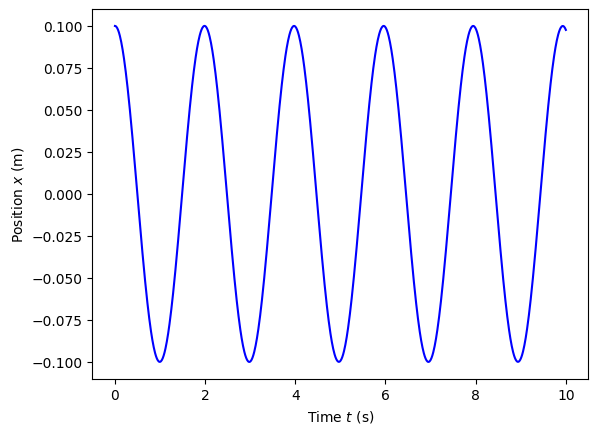

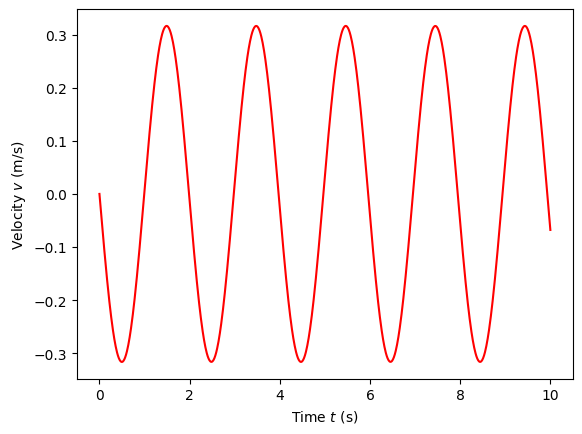

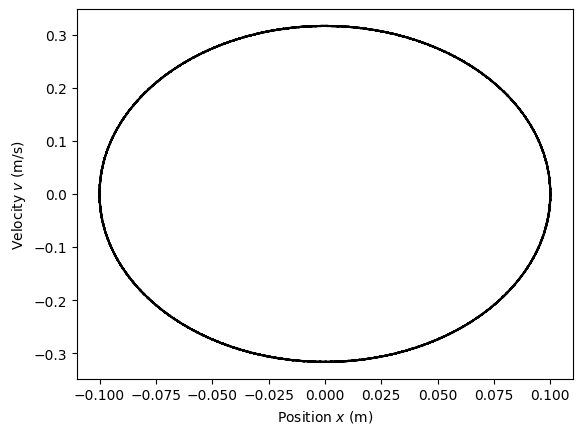

In [4]:
t = sol.t
x = sol.y[0]
v = sol.y[1]
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel('Time $t$ (s)')
plt.ylabel('Position $x$ (m)')
plt.plot(t,x,'b-')
plt.show()
plt.xlabel('Time $t$ (s)')
plt.ylabel('Velocity $v$ (m/s)')
plt.plot(t,v,'r-')
plt.show()
plt.xlabel('Position $x$ (m)')
plt.ylabel('Velocity $v$ (m/s)')
plt.plot(x,v,'k--')
plt.show()

The most import addtional arguments to solve_ivp is to control the accuracy of the computed solution.
There is a parameter to control the absolute error, atol, and a parameter to control the relative error, rtol.
The method attempts to find a solution such that the error is each time step is less than
$atol+rtol\cdot |y|$ where $y$ is an array with the solution. A value of 1e-8 $\left(10^{-8}\right)$ is sufficient for most
simple problems. 
```python
sol = solve_ivp(....,atol=1e-8,rtol=1e-8)
```

## Determining maxima and minima of solutions
It is often required to determine maxima and minima of solutions, such as for the position, either to 
determine the amplitude of an oscillation or to determine the period of oscillation.
In principle these could be found from the data generated for the solution, however, this will not always give a sufficiently accurate determination.
Instead we use so-called events, that are points along the solution that we want to locate accurately.
For instance to find a zero for the velocity is an event, where the solution satisfies $v(t)=0$.
The solve_ivp method can have several registered events that it searches for and locates during integration.


To use events you define a function that is zero at the event, and changes sign going from positive to negative or vice versa at
the points of interest.
Such a function can be defined as
```python
def zero(t,y):
    x,v = y
    return v
```
When solve_ivp detects that the function changes sign it locates the point accurately, and adds the time to an array, t_events, and the
position and velocity to an array, y_events, both of which can be accessed throug the sol structure.

If you are only interested in the zeros where the velocity changes from positive to negative this 
can be achieved by setting the direction flag:
```python
zero.direction = -1
```
If you set the flag to +1 you will find zeros where the velocity changes from negative to positive only.
If you only want to find one event you can signal that solve_ivp should stop after the event is located
```python
zero.terminal = True
```
The default valuef or terminal is False, so if you don't want to stop after the first event you don't have to do anything.


### Maxima
To use events to find maxima for $x(t)$ we define a function that has zeros there which is where the velocity is zero.
To catch only maxima the velocity goes from positive to negative so the direction flag should be set to -1.
```python
def maxima(t,y):
    x,v = y
    return v
maxima.direction = -1
```

### Minima
For minima we can use the same function as above but setting the direction flag to +1 since for minima
the velocity goes from negative to positive.
```python
def minima(t,y):
    x,v = y
    return v
minima.direction = 1
```

In the example below we analyse a damped oscillator and determine first the maxima and then the minima. 
Note the we give solve_ivp an extra parameter, events=[maxima], which may contain more than one event type, so you can search for several events at a time.
Upon return the times of the events can be found in sol.t_events[0] and with different index if there are more events registered. 
To get the values of the position, $x$, at the events we have to use the command 
```python
sol.y_events[0][:,0] 
```
that takes the first event and the for all row values and only column 1, which is the $x$ values.
The $v$ values could be found by 
```python
sol.y_events[0][:,1]
```
but in our case they are all zero (or close to zero as this defined the event).
Both $x$ and $v$ values are printed out at the end of the code below.

The maxima are also plotted in the figure with the command
```python
plt.plot(sol.t_events[0],sol.y_events[0][:,0],'kx')
```
that plots an x at each maxima.

<Figure size 600x500 with 0 Axes>

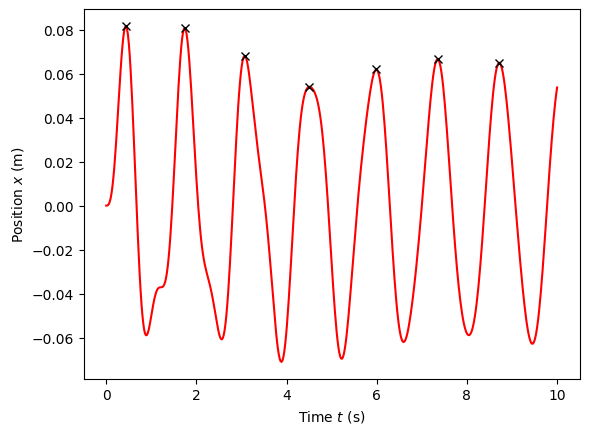

[0.08172433 0.08081977 0.06814989 0.0540518  0.06192316 0.0666717
 0.06497939]
[-7.80625564e-17 -1.14491749e-16  3.53883589e-16 -1.09721260e-16
 -5.79397641e-16 -6.97358837e-16  3.57353036e-16]


In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
m = 0.100
b = 0.050
k = 10.0
A = 0.5
omega = 4.5
t = np.linspace(0,10.0,500)
def f(t,y):
    x,v = y
    dxdt = v
    dvdt = (A*np.sin(omega*t)-k*x-b*v)/m
    return [dxdt,dvdt]
def maxima(t,y):
    x,v = y
    return v
maxima.direction = -1
sol = solve_ivp(f,[t[0],t[-1]],[0.0,0.0],t_eval=t,events=[maxima],rtol=1e-8,atol=1e-8)
#display(sol)
plt.figure(figsize=(6,5))
fig, ax = plt.subplots()
plt.xlabel('Time $t$ (s)')
plt.ylabel('Position $x$ (m)')
plt.plot(t,sol.y[0],'r-')
plt.plot(sol.t_events[0],sol.y_events[0][:,0],'kx')
plt.show()
print(sol.y_events[0][:,0])
print(sol.y_events[0][:,1])

We repeat this time locating the minima.

<Figure size 600x500 with 0 Axes>

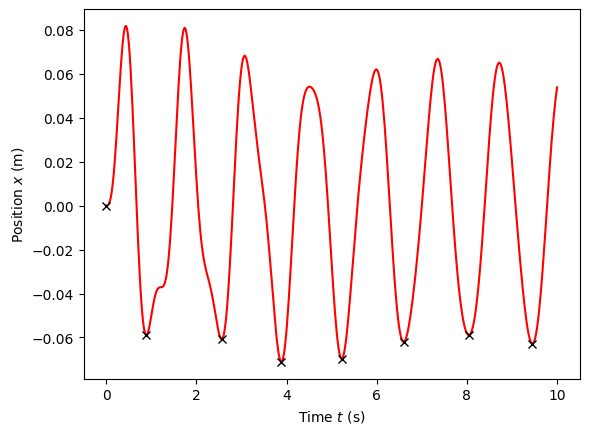

In [6]:
def minima(t,y):
    x,v = y
    return v
minima.direction = 1
sol = solve_ivp(f,[t[0],t[-1]],[0.0,0.0],t_eval=t,events=[minima],rtol=1e-8,atol=1e-8)
plt.figure(figsize=(6,5))
fig, ax = plt.subplots()
plt.xlabel('Time $t$ (s)')
plt.ylabel('Position $x$ (m)')
plt.plot(t,sol.y[0],'r-')
plt.plot(sol.t_events[0],sol.y_events[0][:,0],'kx')
plt.show()

Below we track both events, maxima and minima.

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.004e-02 ...  9.980e+00  1.000e+01]
        y: [[ 0.000e+00  3.003e-05 ...  5.078e-02  5.373e-02]
            [ 0.000e+00  4.485e-03 ...  1.592e-01  1.357e-01]]
      sol: None
 t_events: [array([ 4.350e-01,  1.740e+00,  3.071e+00,  4.508e+00,
                   5.990e+00,  7.350e+00,  8.717e+00]), array([ 0.000e+00,  8.893e-01,  2.561e+00,  3.885e+00,
                   5.222e+00,  6.596e+00,  8.042e+00,  9.452e+00])]
 y_events: [array([[ 8.172e-02, -7.806e-17],
                  [ 8.082e-02, -1.145e-16],
                  ...,
                  [ 6.667e-02, -6.974e-16],
                  [ 6.498e-02,  3.574e-16]]), array([[ 0.000e+00,  0.000e+00],
                  [-5.904e-02,  5.777e-16],
                  ...,
                  [-5.895e-02,  1.046e-17],
                  [-6.287e-02, -8.674e-16]])]
     nfev: 3674
     njev: 0
      nlu: 0


<Figure size 600x500 with 0 Axes>

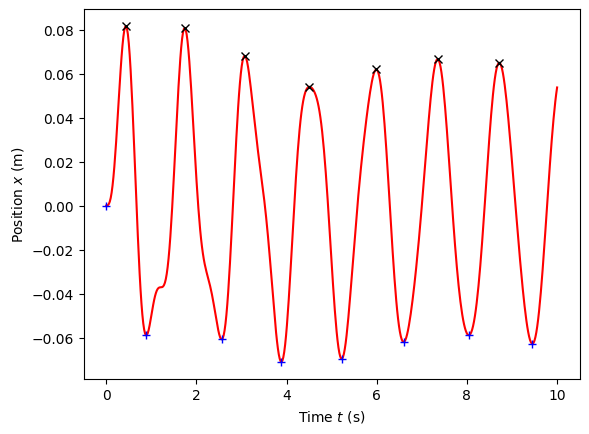

In [8]:
sol = solve_ivp(f,[t[0],t[-1]],[0.0,0.0],t_eval=t,events=[maxima,minima],rtol=1e-8,atol=1e-8)
print(sol)
plt.figure(figsize=(6,5))
fig, ax = plt.subplots()
plt.xlabel('Time $t$ (s)')
plt.ylabel('Position $x$ (m)')
plt.plot(t,sol.y[0],'r-')
plt.plot(sol.t_events[0],sol.y_events[0][:,0],'kx')
plt.plot(sol.t_events[1],sol.y_events[1][:,0],'b+')
plt.show()

## Determining the period of a nonlinear oscillation
We consider a nonlinear oscillator with a nonlinear spring element, and wish to determine the period of the oscillation.

>$m\ddot x=-k_1x+k_3x^3$

We use the parameter values and initial conditions below. 
```python
m = 0.5
k1 = 10.0
k3 = 3.7
x0 = 0.8
v0 = 0.0
```
We are going to plot the spring force as a function of extension for the nonlinear spring together with a linear spring ($k_3$=0).
Next we till simulate the equations of motion with the given parameter values and the initial conditions, and 
make time and phase plots.
Finally, we will determine the period of the nonlinear oscillation of the system.

<Figure size 600x500 with 0 Axes>

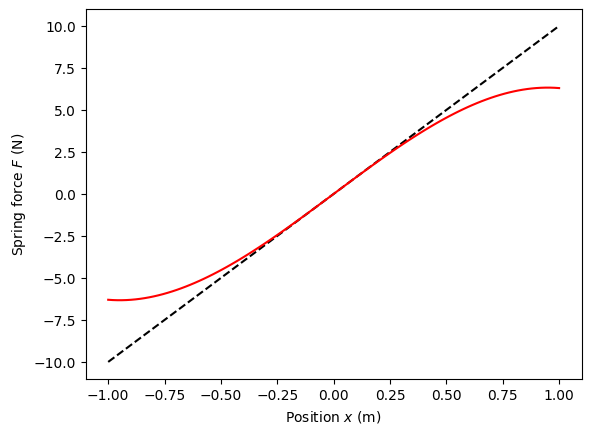

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
m = 0.5
k1 = 10.0
k3 = 3.7
x0 = 1.0
v0 = 0.0
x = np.linspace(-x0,x0,100)
plt.figure(figsize=(6,5))
fig, ax = plt.subplots()
plt.xlabel('Position $x$ (m)')
plt.ylabel('Spring force $F$ (N)')
plt.plot(x,k1*x,'k--')
plt.plot(x,k1*x-k3*x**3,'r-')
plt.show()

We notice that the spring force deviates from the linear Hooke's law from around
$x=0.2$, and since our initial condition is $x_0=1.0$ we are well into the nonlinear regime.

<Figure size 600x500 with 0 Axes>

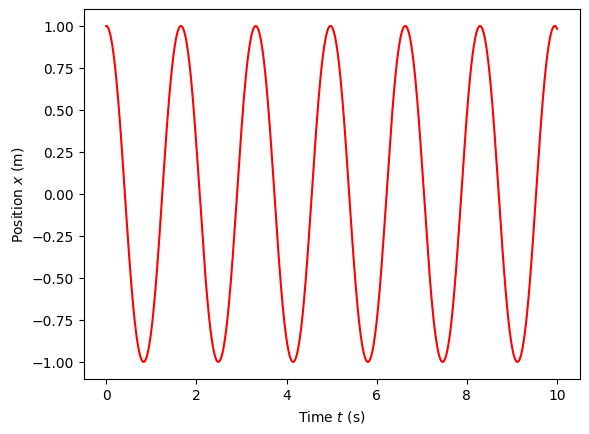

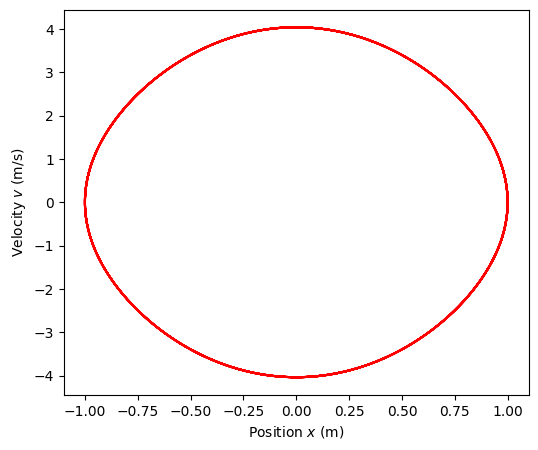

In [8]:
t = np.linspace(0,10.0,1000)
def f(t,y):
    x,v = y
    dxdt = v
    dvdt = (-k1*x+k3*x**3)/m
    return [dxdt,dvdt]
sol = solve_ivp(f,[t[0],t[-1]],[x0,v0],t_eval=t,rtol=1e-8,atol=1e-8)
plt.figure(figsize=(6,5))
fig, ax = plt.subplots()
plt.xlabel('Time $t$ (s)')
plt.ylabel('Position $x$ (m)')
plt.plot(t,sol.y[0],'r-')
plt.show()
plt.figure(figsize=(6,5))
plt.xlabel('Position $x$ (m)')
plt.ylabel('Velocity $v$ (m/s)')
plt.plot(sol.y[0],sol.y[1],'r-')
plt.show()

The time evolution of the position is oscillatory but it is not so clear how nonlinear (non-sinusoidal)
the oscillations are. 
The phase plot more clearly demonstrates that we are in a very nonlinear regime (not a circle, and not an ellipse).


Next we calculate all maxima with an event as earlier, and plot the result.

<Figure size 600x500 with 0 Axes>

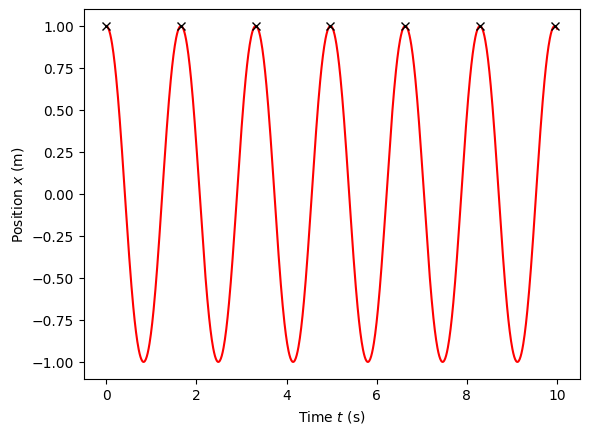

In [9]:
def maxima(t,y):
    x,v = y
    return v
maxima.direction = -1
sol = solve_ivp(f,[t[0],t[-1]],[x0,v0],t_eval=t,events=[maxima],rtol=1e-8,atol=1e-8)
plt.figure(figsize=(6,5))
fig, ax = plt.subplots()
plt.xlabel('Time $t$ (s)')
plt.ylabel('Position $x$ (m)')
plt.plot(t,sol.y[0],'r-')
plt.plot(sol.t_events[0],sol.y_events[0][:,0],'kx')
plt.show()


The x symbols are the maxima, and we see that the distance (in time) between the points is the period of the oscillation.

We select the times and print them.

In [10]:
T = sol.t_events[0]
print(T)

[0.         1.65802352 3.31604703 4.9740705  6.63209397 8.2901174
 9.94814082]


We want to compute the distance between the times, and do it by selecting an array of
all but the first point, and then selcting all but the last point, and then computing the 
different. T[0:-1] returns all elements apart from th elast (the selction is inclusive for the first element and
exclusive for the last element). T[1:] return all elements from the second to the last.

In [11]:
print(T[0:-1]) # does not include last element T[-1]
print(T[1:]) # include all but the first element

[0.         1.65802352 3.31604703 4.9740705  6.63209397 8.2901174 ]
[1.65802352 3.31604703 4.9740705  6.63209397 8.2901174  9.94814082]


Now we compute the difference between the arrays and compute mean, standard deviation, and standard deviation of the mean.

In [12]:
DT = T[1:]-T[0:-1]
print(DT)
DTm = np.mean(DT)
DTstd = np.std(DT,ddof=1)
DTsdom = DTstd / np.sqrt(np.size(DT))
from uncertainties import *
DTufloat = ufloat(DTm,DTsdom)
print(DTufloat)

[1.65802352 1.6580235  1.65802347 1.65802347 1.65802343 1.65802341]
1.658023469+/-0.000000017


Note that we have computed the period with a very small uncertainty.

## Find the maximum point an object
Consider an object being thrown up in the air with linear air resistance. The model is
>$m\dot v=-kv-mg$

which can be formulated as two first order equations.

> $\dot x=v$

> $\dot v= \frac{-kv-mg}{m}$

We want to find the heighest point the object reaches.

Parameters and initial conditions are:
```python
m = 0.200
k = 0.3
g = 9.82
x0 = 2.0
v0 = 10.0
```
We modify the event by declaring it to be terminal, that is, the simulation should stop when the event has been located.
```python
def maxima(t,y):
    x,v = y
    return v
maxima.direction = -1 # find maximum
maxima.terminal = True # stop when reaching maximum
```

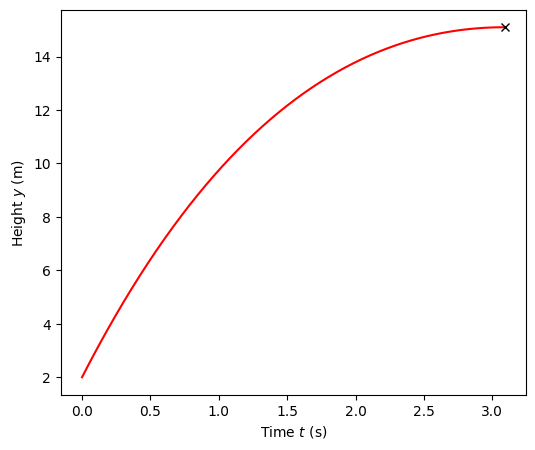

top point = 15.099143517752578


In [14]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
m = 0.200
k = 0.3
g = 9.82
x0 = 2.0
v0 = 10.0
t = np.linspace(0,10.0,500)
def f(t,y):
    x,v = y
    dxdt = v
    dvdt = -m*g-k*v
    return [dxdt,dvdt]
def maxima(t,y):
    x,v = y
    return v
maxima.direction = -1
maxima.terminal = True
sol = solve_ivp(f,[t[0],t[-1]],[x0,v0],t_eval=t,events=[maxima],rtol=1e-8,atol=1e-8)
plt.figure(figsize=(6,5))
plt.xlabel('Time $t$ (s)')
plt.ylabel('Height $y$ (m)')
plt.plot(sol.t,sol.y[0],'r-')
plt.plot(sol.t_events[0],sol.y_events[0][:,0],'kx')
plt.show()
print('top point =',sol.y_events[0][:,0][0])

#### Forced oscillations

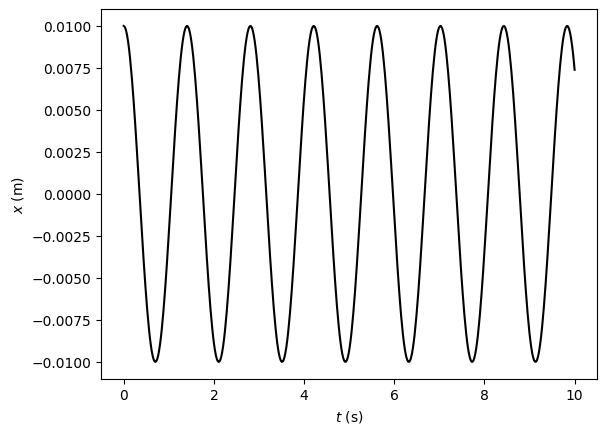

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
m = 0.50
k = 10.0
b = 0.0
A = 0.0
omega = 2.0
def f(t,z):
    x,v = z
    dxdt = v
    dvdt = (A*np.sin(omega*t)-k*x-b*v)/m
    return [dxdt,dvdt]
t_eval = np.linspace(0,10,500)
t_span = [0,10]
sol = solve_ivp(f,t_span=t_span,y0=[0.01,0],t_eval=t_eval,rtol=1e-8,atol=1e-8)
t = sol.t
x = sol.y[0]
v = sol.y[1]
plt.figure()
plt.xlabel('$t$ (s)')
plt.ylabel('$x$ (m)')
plt.plot(t,x,'k-')
plt.show()

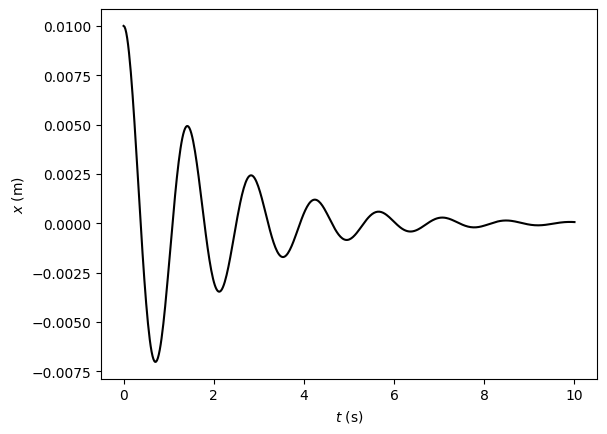

In [8]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
m = 0.50
k = 10.0
b = 0.5
A = 0.0
omega = 2.0
def f(t,z):
    x,v = z
    dxdt = v
    dvdt = (A*np.sin(omega*t)-k*x-b*v)/m
    return [dxdt,dvdt]
t_eval = np.linspace(0,10,500)
t_span = [0,10]
sol = solve_ivp(f,t_span=t_span,y0=[0.01,0],t_eval=t_eval,rtol=1e-8,atol=1e-8)
t = sol.t
x = sol.y[0]
v = sol.y[1]
plt.figure()
plt.xlabel('$t$ (s)')
plt.ylabel('$x$ (m)')
plt.plot(t,x,'k-')
plt.show()

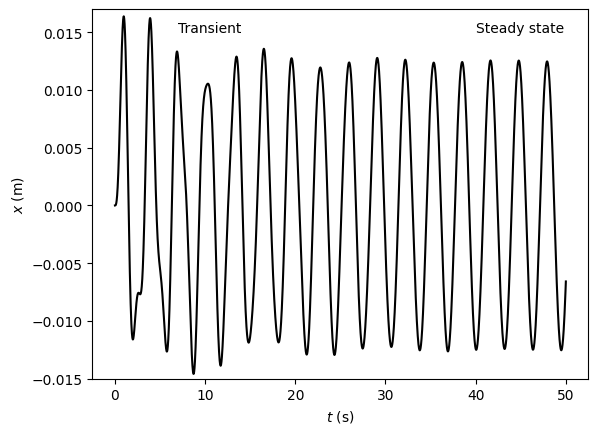

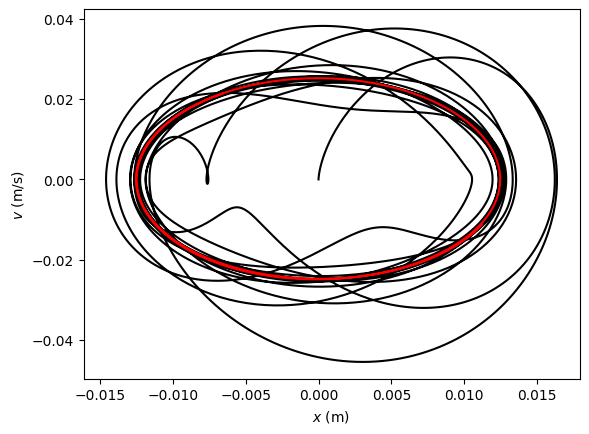

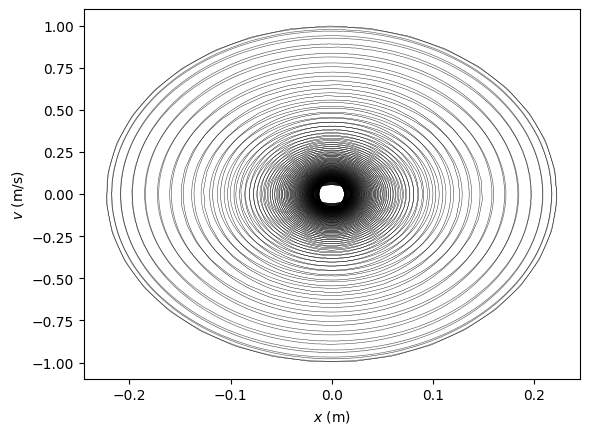

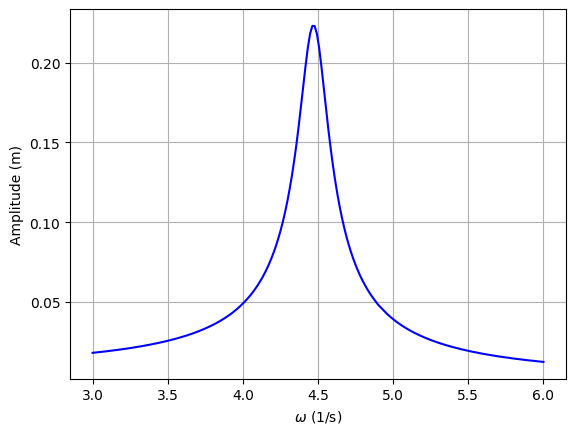

In [8]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
m = 0.50
k = 10.0
b = 0.1
A = 0.1
omega = 2.0
def f(t,z):
    x,v = z
    dxdt = v
    dvdt = (A*np.sin(omega*t)-k*x-b*v)/m
    return [dxdt,dvdt]
t_eval = np.linspace(0,50,5000)
t_span = [0,50]
sol = solve_ivp(f,t_span=t_span,y0=[0,0],t_eval=t_eval,rtol=1e-8,atol=1e-8)
t = sol.t
x = sol.y[0]
v = sol.y[1]
plt.figure()
plt.xlabel('$t$ (s)')
plt.ylabel('$x$ (m)')
plt.ylim(-0.015,0.017)
plt.text(7,0.015,'Transient')
plt.text(40,0.015,'Steady state')
plt.plot(t,x,'k-')
plt.show()
plt.xlabel('$x$ (m)')
plt.ylabel('$v$ (m/s)')
plt.plot(x,v,'k-')
plt.plot(x[-500:],v[-500:],'r-')
plt.show()
transient = 100.0
duration = 20.0
t_eval = np.linspace(transient,transient+duration,500)
t_span = [0,transient+duration]
plt.figure()
omegas = []
amps = []
for omega in np.linspace(3.0,6.0,200):
    sol = solve_ivp(f,t_span=t_span,y0=[0,0],t_eval=t_eval,rtol=1e-8,atol=1e-8)
    #display(sol)
    t = sol.t
    x = sol.y[0]
    v = sol.y[1]
    omegas.append(omega)
    amps.append(np.max(x))
    plt.plot(x,v,'k-',linewidth=0.02)
plt.xlabel('$x$ (m)')
plt.ylabel('$v$ (m/s)')
plt.show()
plt.xlabel('$\omega$ (1/s)')
plt.ylabel('Amplitude (m)')
plt.plot(omegas,amps,'b-')
plt.grid()
plt.show()

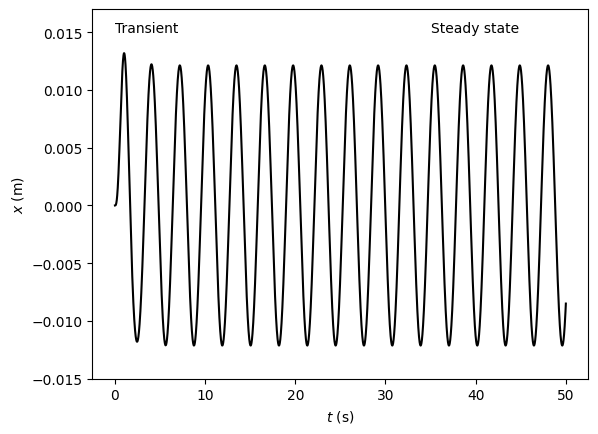

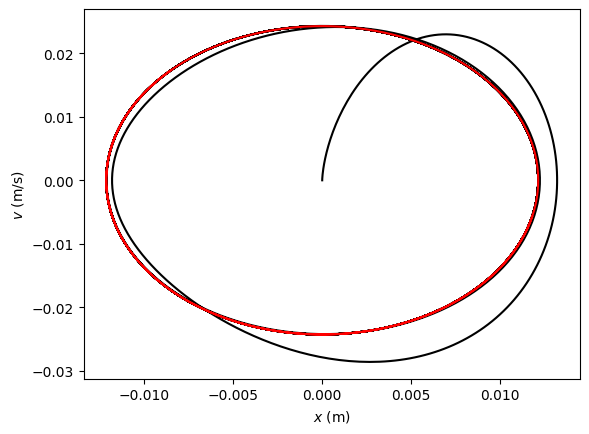

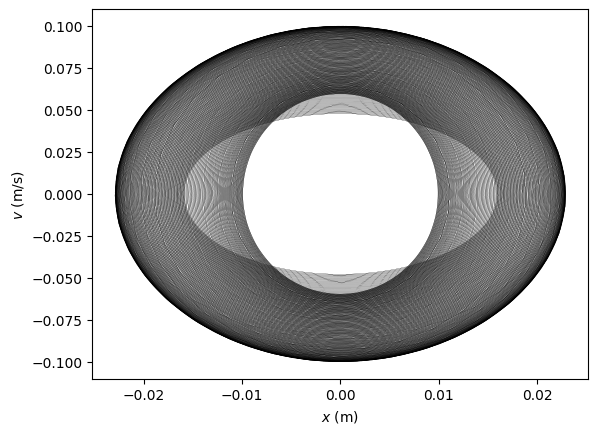

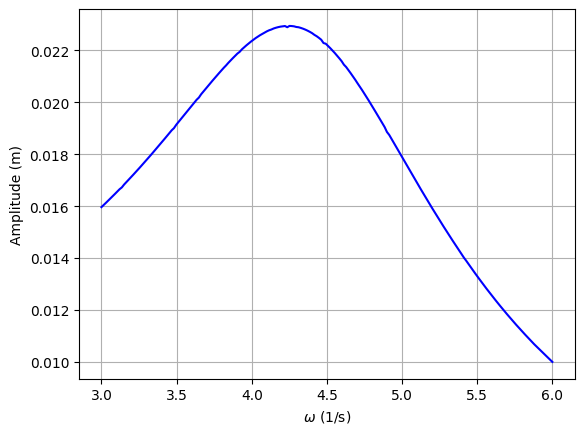

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
m = 0.50
k = 10.0
b = 1.0
A = 0.1
omega = 2.0
def f(t,z):
    x,v = z
    dxdt = v
    dvdt = (A*np.sin(omega*t)-k*x-b*v)/m
    return [dxdt,dvdt]
t_eval = np.linspace(0,50,5000)
t_span = [0,50]
sol = solve_ivp(f,t_span=t_span,y0=[0,0],t_eval=t_eval,rtol=1e-8,atol=1e-8)
t = sol.t
x = sol.y[0]
v = sol.y[1]
plt.figure()
plt.xlabel('$t$ (s)')
plt.ylabel('$x$ (m)')
plt.ylim(-0.015,0.017)
plt.text(0,0.015,'Transient')
plt.text(35,0.015,'Steady state')
plt.plot(t,x,'k-')
plt.show()
plt.xlabel('$x$ (m)')
plt.ylabel('$v$ (m/s)')
plt.plot(x,v,'k-')
plt.plot(x[-500:],v[-500:],'r-')
plt.show()
transient = 100.0
duration = 20.0
t_eval = np.linspace(transient,transient+duration,500)
t_span = [0,transient+duration]
plt.figure()
omegas = []
amps = []
for omega in np.linspace(3.0,6.0,200):
    sol = solve_ivp(f,t_span=t_span,y0=[0,0],t_eval=t_eval,rtol=1e-8,atol=1e-8)
    t = sol.t
    x = sol.y[0]
    v = sol.y[1]
    omegas.append(omega)
    amps.append(np.max(x))
    plt.plot(x,v,'k-',linewidth=0.02)
plt.xlabel('$x$ (m)')
plt.ylabel('$v$ (m/s)')
plt.show()
plt.xlabel('$\omega$ (1/s)')
plt.ylabel('Amplitude (m)')
plt.plot(omegas,amps,'b-')
plt.grid()
plt.show()